# <center>MACHINE LEARNING <br> <br> Problem Session 5 <br> Decision Trees and Ensemble Models</center>

In this exercise we will execute decision trees and adaboost with the Sklearn library
for the Iris multiclassification. We will use the graphviz library to evaluate the node split.

**USEFULL PYTHON FUNCTIONS**
- 

In [1]:
################################
# NEEDED IMPORTS AND FUNCTIONS #
################################

# LLIBRARIES
from sklearn.datasets import load_iris
from sklearn import tree, metrics
import numpy as np
from graphviz import Source

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.ensemble import AdaBoostClassifier # for AdaBoost model

### Exercice 4


In [2]:
################################
#      LOAD IRIS DATASET       #
################################

iris = load_iris()
print('Feature Names: ', iris.feature_names)

Feature Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


1. Build *a* decision tree classifier and train it with `iris.data` and `iris.target` from uploaded iris dataset.

In [3]:
#### SOLUTION
X = iris.data
y = iris.target
dtClassifier = tree.DecisionTreeClassifier(criterion= 'gini') 
dtClassifier.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

2. Visualize and plot the decision tree nodes.


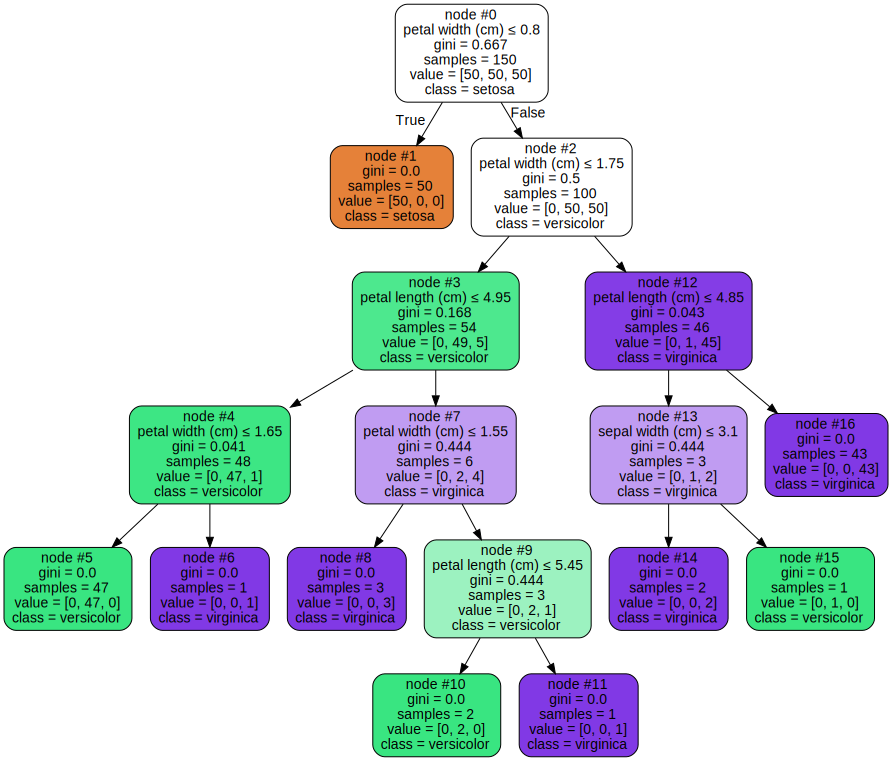

In [4]:
graph = Source(tree.export_graphviz(dtClassifier, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, node_ids= True, special_characters=True)) 
graph.format = 'png'
graph

3. Predict the class for the following rows index of the iris dataset: [0,1,50,51,100,101]. Which is the node for each sample? 

In [5]:
### ---- YOUR SOLUTION: BEGIN ----- ###

# CLASES ARE: []

### ---- YOUR SOLUTION: END ----- ###

#### SOLUTION Classes are: [0, 0, 1, 1, 2, 2]

4. Use DecisionTrees again to classify the dataset, but splitting the dataset into train/test in a 0.7 ratio. Then, calculate the accuracy of the model.

In [6]:
#### SOLUTION
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
dtClassifier = tree.DecisionTreeClassifier(criterion= 'gini') 
dtClassifier.fit(X_train, y_train)
y_pred = dtClassifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


### Exercice 5



1.   Compare the accuracy with exercise 4 and a basic adaboost classifier. ¿Does it improves the accuracy? 





In [ ]:
### SOLUTION ####
# Create adaboost classifer object
abc2 = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

# Train Adaboost Classifer
model2 = abc2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = model2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.9111111111111111


2.   AdaBoost uses Decision Tree Classifier as default Classifier. ¿Does it have the same accuracy if we have a different base classifier? 
Test the Adaboost classifier with other weak learners: Eg. SVM. 


In [7]:
# Import Support Vector Classifier
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')

### SOLUTION ####
# Create adaboost classifer object
abc3 =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model3 = abc3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred3 = model3.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.9777777777777777


3. ¿Can you compare the accuracy of these different models with a simple Decision Tree from exercise 4 ?

In [ ]:
### SOLUTION
